# Exemples des méthodes de PCE

Construction des métamodèles et utilisations des méthode de la classe PolynomialChaos

In [1]:
import openturns as ot
from openturns.viewer import View
import numpy as np
from matplotlib import pyplot as plt
import pythontools as pyto

## Initialisation 

In [2]:
degree = 2 # degré du polynôme de chaos
size = 1000 # nombre d'échantillons à générer pour la méthode fit_by_integration

## Definition des variables d'entrées et de leurs distributions

In [3]:
L = ot.LogNormal()
L.setParameter(ot.LogNormalMuSigmaOverMu()([5., .02, 0.]))
b = ot.LogNormal()
b.setParameter(ot.LogNormalMuSigmaOverMu()([.2, .05, 0.]))
h = ot.LogNormal()
h.setParameter(ot.LogNormalMuSigmaOverMu()([.4, .05, 0.]))
E = ot.LogNormal()
E.setParameter(ot.LogNormalMuSigmaOverMu()([3e4, .12, 0.]))
F = ot.LogNormal()
F.setParameter(ot.LogNormalMuSigmaOverMu()([.1, .20, 0.]))

# Définition de la distribution composée de tous les variables
distribution = ot.ComposedDistribution([L, b, h, E, F])

## Définir les fonctions originales

In [4]:
# fonction originale à une seule sortie
beam = ot.SymbolicFunction(
    ['L', 'b', 'h', 'E', 'F'], ['F * L^3 / (48 * E * b * h^3 / 12)'])
# fonction originale à deux sorties
beam_multi = ot.SymbolicFunction(
    ['L', 'b', 'h', 'E', 'F'],
    ['F * L^3 / (48 * E * b * h^3 / 12)', 'b * h^3 / 12'])

## Génération d'un plan d'expériences et des échantillons test

In [5]:
# Plan d'expérience de 150 points
ot.RandomGenerator.SetSeed(654)
input_sample = distribution.getSample(150)
output_sample = beam(input_sample)
output_sample_multi = beam_multi(input_sample)

# Échantillons test de 50 points
ot.RandomGenerator.SetSeed(125)
input_sample_test = distribution.getSample(50)
output_sample_test = beam(input_sample_test)
output_sample_multi_test = beam_multi(input_sample_test)

## Définition de plusieurs class Polynomials chaos

In [6]:
chaos_1 = pyto.PolynomialChaos(distribution)
chaos_2 = pyto.PolynomialChaos(distribution)
chaos_multi_1 = pyto.PolynomialChaos(distribution)
chaos_multi_2 = pyto.PolynomialChaos(distribution)

## Construction des métamodèle de PCE en utilisant plusieurs méthodes

In [7]:
## un seul métamodèle avec la méthode "fit"
chaos_meta_1 = chaos_1.fit(input_sample, output_sample, degree, sparse=False)
## un seul métamodèle avec la méthode "fit_by_integration" 
chaos_meta_2 = chaos_2.fit_by_integration(beam, size, degree)

## plusieurs métamodèles avc la méthode la méthode "fit"
## Le nombre de mếtamodèles est équivalent au nombre des sorties
chaos_multi_meta_1 = chaos_multi_1.fit(
    input_sample, output_sample_multi, degree, sparse=False)

## plusieurs métamodèles avc la méthode la méthode "fit_by_integration"
## Le nombre de mếtamodèles est équivalent au nombre des sorties
chaos_multi_meta_2 = chaos_multi_2.fit_by_integration(
    beam_multi, size, degree)

## Evaluation de la qualité des métamodèles construits en calculant r2 et q2

In [22]:
## calcul des valeurs de q2 pour les métamodèles construits par la méthode "fit"
## remarque: le calcul de q2 pour les métamodèles construit avec "fit_by_integration" n'ai pas disponble
display(chaos_1.compute_q2())
display(chaos_multi_1.compute_q2())

,y0
Q2,0.998648


,y0,y1
Q2,0.998648,0.999985


In [23]:
## calcul des valeurs de r2 pour les métamodèles en se basant sur les point DOE uniquement
display(chaos_1.compute_r2())
display(chaos_2.compute_r2())
display(chaos_multi_1.compute_r2())
display(chaos_multi_2.compute_r2())

,y0
R2,0.999364


,y0
R2,0.999691


,y0,y1
R2,0.999364,0.999993


,y0,y1
R2,0.999691,1


In [24]:
## calcul des valeurs de r2 pour les métamodèles en se basant sur les échantillons test
display(chaos_1.compute_r2(input_sample_test, output_sample_test))
display(chaos_2.compute_r2(input_sample_test, output_sample_test))
display(chaos_multi_1.compute_r2(input_sample_test, output_sample_multi_test))
display(chaos_multi_2.compute_r2(input_sample_test, output_sample_multi_test))

,y0
R2,0.999109


,y0
R2,0.990695


,y0,y1
R2,0.999109,0.999969


,y0,y1
R2,0.990695,0.994163


## Tracer les courbes de validation

/home/dumas/anaconda/envs/pythontools/lib/python3.8/site-packages/pythontools-0.0.1-py3.8.egg/pythontools/_polynomial_chaos.py:189: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


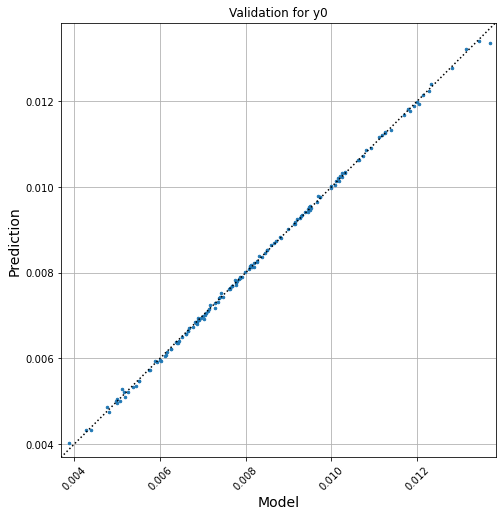

In [25]:
# tracer la courbe de validation pour chaos_1 en se basant sur les points du DOE
chaos_1.draw_validation()

/home/dumas/anaconda/envs/pythontools/lib/python3.8/site-packages/pythontools-0.0.1-py3.8.egg/pythontools/_polynomial_chaos.py:189: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


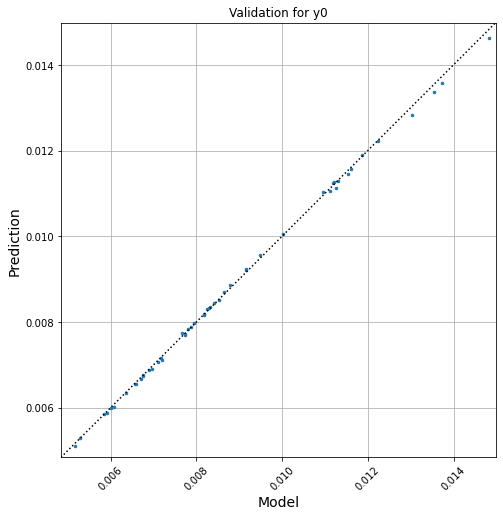

In [26]:
# tracer la courbe de validation pour chaos_1 en se basant sur les points test
chaos_1.draw_validation(input_sample_test, output_sample_test)

/home/dumas/anaconda/envs/pythontools/lib/python3.8/site-packages/pythontools-0.0.1-py3.8.egg/pythontools/_polynomial_chaos.py:189: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/dumas/anaconda/envs/pythontools/lib/python3.8/site-packages/pythontools-0.0.1-py3.8.egg/pythontools/_polynomial_chaos.py:189: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


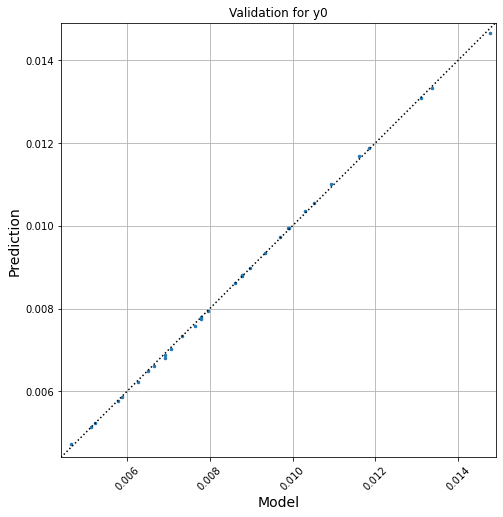

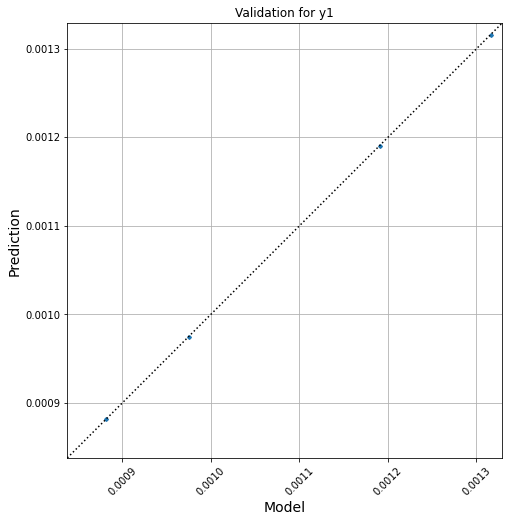

In [27]:
# tracer la courbe de validation pour chaos_2 en se basant sur les points du DOE
chaos_multi_2.draw_validation()

/home/dumas/anaconda/envs/pythontools/lib/python3.8/site-packages/pythontools-0.0.1-py3.8.egg/pythontools/_polynomial_chaos.py:189: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/dumas/anaconda/envs/pythontools/lib/python3.8/site-packages/pythontools-0.0.1-py3.8.egg/pythontools/_polynomial_chaos.py:189: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


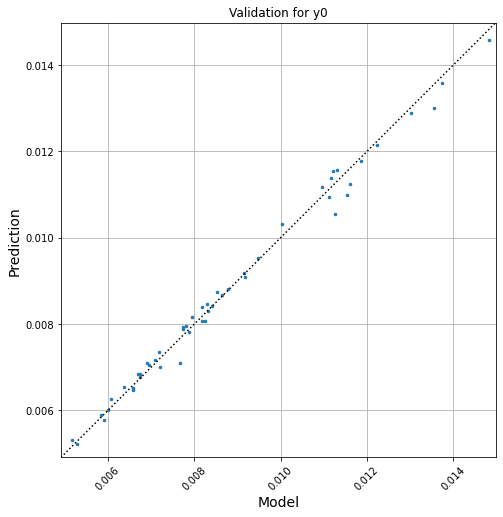

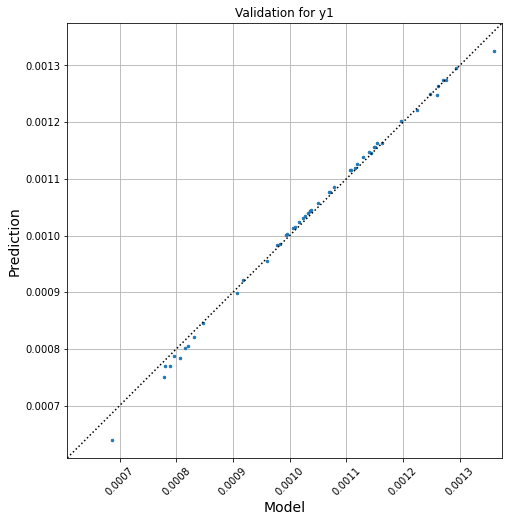

In [28]:
# tracer la courbe de validation pour chaos_2 en se basant sur les points test
chaos_multi_2.draw_validation(input_sample_test, output_sample_multi_test)

## Utilisation des métamodèles

### Estimation de la valeur des fonctions originales 

#### Cas d'un seul point

In [29]:
x = [5,0.2,0.4,3e4,0.1]
# cas d'une seule fonction
# calcul en utilisant la fonction originale
print('valeur exacte pour la première fonction =', beam(x))
# estimation de la valeur de la première fonction 
print('valeur estimée pour la première fonction =', chaos_meta_1(x))

# cas de deux fonctions
# calcul en utilisant la fonction originale
print('valeurs exactes pour les deux fonctions =', beam_multi(x))
# estimation de la valeur de la première fonction 
print('valeurs estimées pour les deux fonctions =', chaos_multi_meta_2(x))

valeur exacte pour la première fonction = [0.00813802]
valeur estimée pour la première fonction = [0.00814503]
valeurs exactes pour les deux fonctions = [0.00813802,0.00106667]
valeurs estimées pour les deux fonctions = [0.00840583,0.00107469]


#### Cas d'un set de points

In [33]:
X = [[5,0.2,0.4,3e4,0.1],[4,0.25,0.45,2.5e4,0.125]]
print('\n cas d\'une seule sortie:')
display(chaos_meta_1(X))
print('\n cas de plusieurs sorties:')
display(chaos_multi_meta_2(X))


 cas d'une seule sortie:


class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=2 dimension=1 description=[y0] data=[[0.00814503],[0.00372041]]


 cas de plusieurs sorties:


class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=2 dimension=2 description=[y0,y1] data=[[0.00840583,0.00107469],[0.00165351,0.00184754]]

### Calcul des indices de Sobol

#### Cas d'une seul sortie

In [34]:
#Récupérer les valeurs des indices de Sobol dans un dataframe
indices_sobol = chaos_1.get_sobol_indices()
print('Indices de Sobol:')
display(indices_sobol)

Indices de Sobol:


y0            
               First order Total order
Input variable                        
X0                   0.042       0.045
X1                   0.029       0.032
X2                   0.264       0.277
X3                   0.170       0.182
X4                   0.471       0.489
Interaction          0.024         NaN

/home/dumas/anaconda/envs/pythontools/lib/python3.8/site-packages/pythontools-0.0.1-py3.8.egg/pythontools/_polynomial_chaos.py:344: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


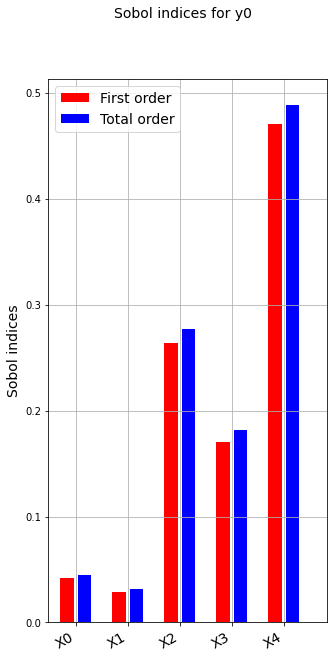

In [35]:
# tracer les indices de Sobol sous forme d'une graphique à barres
chaos_1.draw_bar_sobol_indices()

/home/dumas/anaconda/envs/pythontools/lib/python3.8/site-packages/openturns/viewer.py:385: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  self._ax[0].pie(x, **pie_kwargs)
/home/dumas/anaconda/envs/pythontools/lib/python3.8/site-packages/pythontools-0.0.1-py3.8.egg/pythontools/_polynomial_chaos.py:302: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/dumas/anaconda/envs/pythontools/lib/python3.8/site-packages/pythontools-0.0.1-py3.8.egg/pythontools/_polynomial_chaos.py:330: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


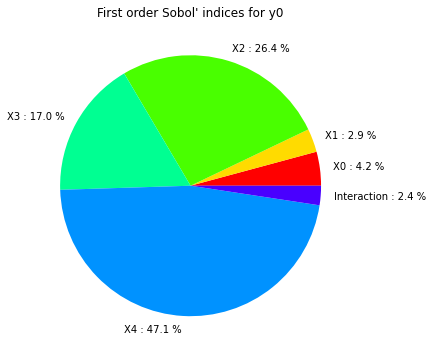

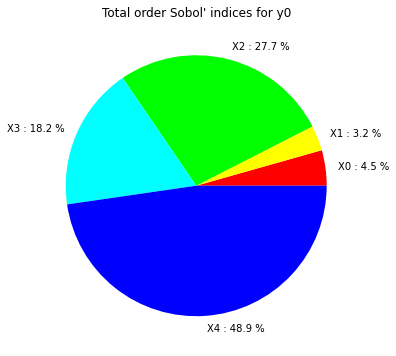

In [36]:
# tracer les indices de Sobol du premier ordre et d'ordre total sous forme d'un diagramme circulaire
chaos_1.draw_first_order_indices()
chaos_1.draw_total_order_indices()

#### Cas de plusieurs sorties

In [37]:
#Récupérer les valeurs des indices de Sobol dans un dataframe
indices_sobol = chaos_multi_1.get_sobol_indices()
print('Indices de Sobol:')
display(indices_sobol)

Indices de Sobol:


y0                      y1            
               First order Total order First order Total order
Input variable                                                
X0                   0.042       0.045       0.000       0.000
X1                   0.029       0.032       0.098       0.101
X2                   0.264       0.277       0.899       0.902
X3                   0.170       0.182       0.000       0.000
X4                   0.471       0.489       0.000       0.000
Interaction          0.024         NaN       0.002         NaN

/home/dumas/anaconda/envs/pythontools/lib/python3.8/site-packages/pythontools-0.0.1-py3.8.egg/pythontools/_polynomial_chaos.py:344: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


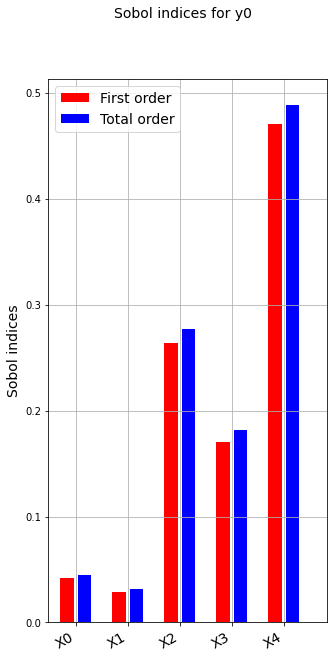

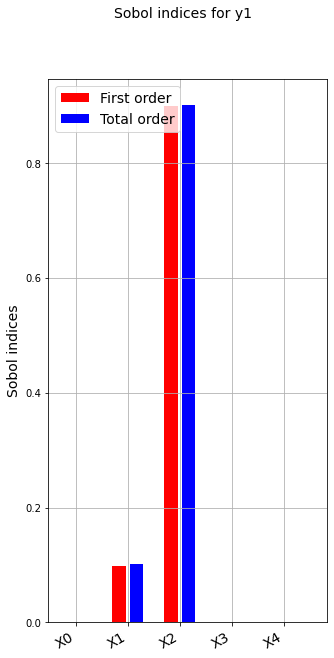

In [38]:
# tracer les indices de Sobol sous forme d'une graphique à barres
chaos_multi_1.draw_bar_sobol_indices()

/home/dumas/anaconda/envs/pythontools/lib/python3.8/site-packages/openturns/viewer.py:385: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  self._ax[0].pie(x, **pie_kwargs)
/home/dumas/anaconda/envs/pythontools/lib/python3.8/site-packages/pythontools-0.0.1-py3.8.egg/pythontools/_polynomial_chaos.py:302: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/dumas/anaconda/envs/pythontools/lib/python3.8/site-packages/pythontools-0.0.1-py3.8.egg/pythontools/_polynomial_chaos.py:330: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


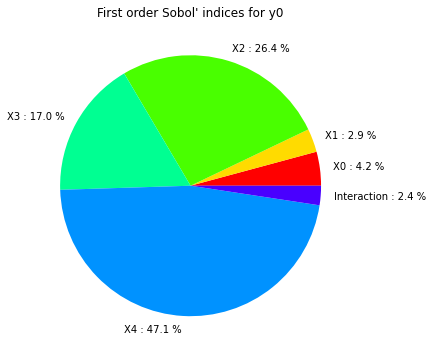

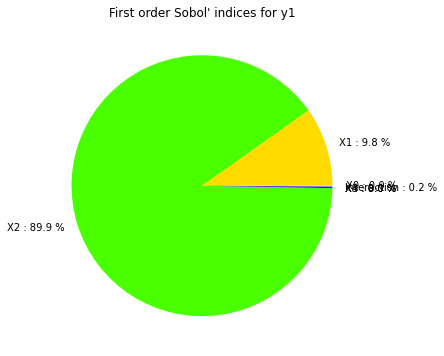

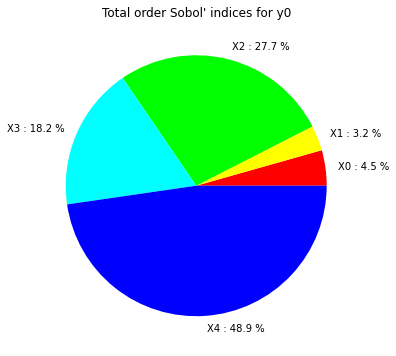

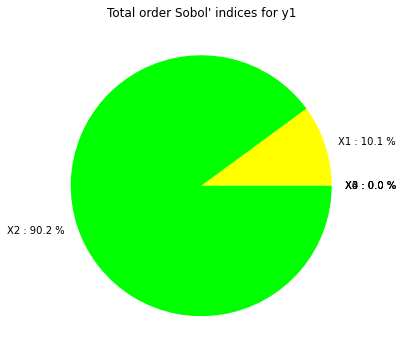

In [39]:
# tracer les indices de Sobol du premier ordre et d'ordre total sous forme d'un diagramme circulaire
chaos_multi_1.draw_first_order_indices()
chaos_multi_1.draw_total_order_indices()